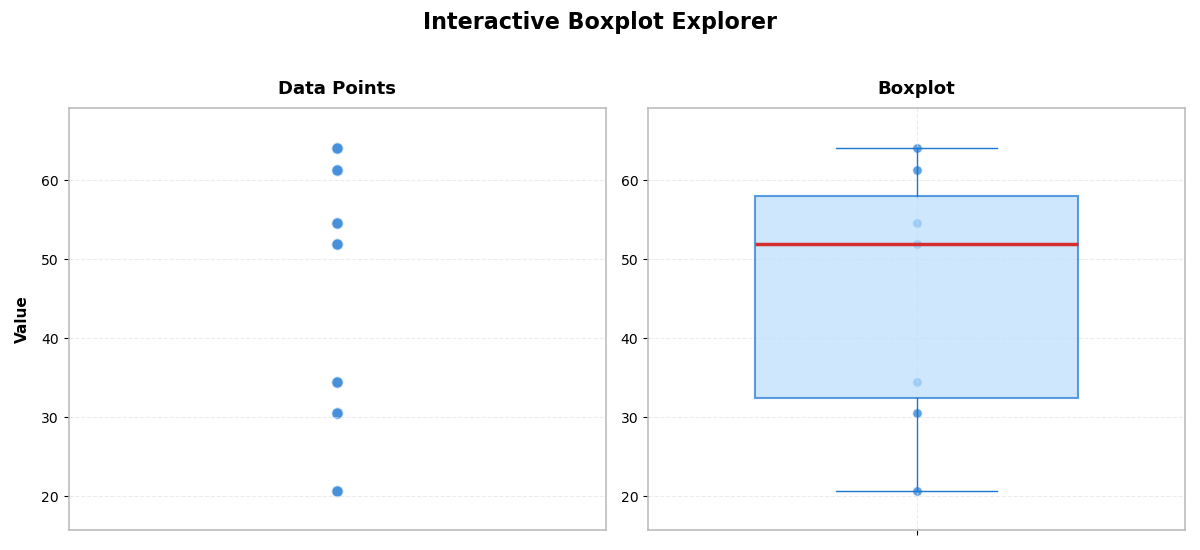

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML

# Display custom CSS for better styling in the notebook
display(HTML("""
<style>
    .widget-button {
        background-color: #1976D2 !important;
        color: white !important;
        border: none !important;
        font-weight: bold !important;
        border-radius: 4px !important;
        height: 36px !important;
        margin-top: 5px !important;
        text-transform: none !important;
    }
    .widget-button:hover {
        background-color: #1565C0 !important;
        transform: translateY(-1px);
        box-shadow: 0 2px 4px rgba(0,0,0,0.2);
    }
    .widget-button:active {
        background-color: #0D47A1 !important;
    }
    .control-group {
        display: flex;
        align-items: center;
        margin-right: 15px;
    }
    .control-group label {
        margin-right: 5px;
        min-width: 100px;
    }
    .explanation-container {
        margin: 10px 0;
        padding: 10px;
        border: 1px solid #E0E0E0;
        border-radius: 5px;
    }
    .stat-label {
        background-color: #e8f5e9;
        padding: 1px 5px;
        border-radius: 3px;
        font-size: 12px;
        font-weight: bold;
        color: #1b5e20;
    }
</style>
"""))

# Create a modern color palette
colors = {
    'primary': '#1976D2',
    'primary_dark': '#1565C0',
    'primary_light': '#90CAF9',
    'secondary': '#FF5722',
    'background': '#F5F7FA',
    'grid': '#E0E0E0',
    'text': '#212121',
    'box_fill': '#BBDEFB',
    'median': '#D32F2F',
    'outlier': '#E53935'
}

# Initialize random number generator with default seed
rng = np.random.default_rng(42)

# Generate initial data using local RNG
def generate_data(n=15, distribution='normal', seed=None):
    global rng
    # If a new seed is provided, create a new RNG
    if seed is not None:
        rng = np.random.default_rng(seed)
    if distribution == 'normal':
        return np.round(rng.normal(50, 15, n), 1)
    elif distribution == 'uniform':
        return np.round(rng.uniform(20, 80, n), 1)
    elif distribution == 'skewed_right':
        return np.round(20 + rng.gamma(2, 10, n), 1)
    elif distribution == 'skewed_left':
        return np.round(100 - rng.gamma(2, 10, n), 1)

# Create the figure with two subplots
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.edgecolor'] = '#BDBDBD'
plt.rcParams['axes.linewidth'] = 1.2

# Create a single figure with two subplots
fig, (ax_scatter, ax_box) = plt.subplots(1, 2, figsize=(12, 5.5))
fig.suptitle('Interactive Boxplot Explorer', fontsize=16, fontweight='bold', y=0.98)

# Initial data
n_points = 7
y = generate_data(n=n_points)
x = np.ones_like(y)  # All points at x=1 for vertical alignment
selected_point = None
distribution = 'normal'

# Plot initial points
scatter = ax_scatter.scatter(x, y, s=80, c=colors['primary'], alpha=0.8, 
                            edgecolor='white', linewidth=1.5, picker=5)
ax_scatter.set_title('Data Points', fontsize=13, fontweight='bold', pad=10)
ax_scatter.set_ylabel('Value', fontweight='bold', labelpad=8)
ax_scatter.set_xticks([])
ax_scatter.grid(True, linestyle='--', alpha=0.6, color=colors['grid'])
ax_scatter.set_facecolor('white')
ax_scatter.set_ylim(0, 100)

# Plot initial boxplot
boxplot = ax_box.boxplot(y, widths=0.6, patch_artist=True, showfliers=True)
# Style the boxplot
for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(boxplot[element], color=colors['primary'])
boxplot['boxes'][0].set(facecolor=colors['box_fill'], alpha=0.7, linewidth=1.5)
boxplot['medians'][0].set(color=colors['median'], linewidth=2.5)
ax_box.set_title('Boxplot', fontsize=13, fontweight='bold', pad=10)
ax_box.set_xticks([1])
ax_box.set_xticklabels([''])
ax_box.grid(True, linestyle='--', alpha=0.6, color=colors['grid'])
ax_box.set_facecolor('white')
ax_box.set_ylim(0, 100)

# Add all points to the boxplot for reference
points_in_box = ax_box.scatter(np.ones_like(y), y, s=50, c=colors['primary'], 
                              alpha=0.7, edgecolor='white', linewidth=1)

# Create a container for the explanation text
explanation_container = widgets.Output()

# Create a container for the points list
points_list_container = widgets.Output(layout=widgets.Layout(margin='10px 0', padding='10px', 
                                                         border='1px solid #E0E0E0',
                                                         border_radius='5px'))

# Function to update boxplot with statistics
def update_boxplot():
    global y, n_points
    
    # Clear and redraw boxplot
    ax_box.clear()
    
    # Calculate boxplot statistics
    bp = ax_box.boxplot(y, widths=0.6, patch_artist=True, showfliers=True)
    
    # Style the boxplot
    for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color=colors['primary'])
    bp['boxes'][0].set(facecolor=colors['box_fill'], alpha=0.7, linewidth=1.5)
    bp['medians'][0].set(color=colors['median'], linewidth=2.5)
    
    # Add all points to the boxplot for reference
    ax_box.scatter(np.ones_like(y), y, s=50, c=colors['primary'], 
                  alpha=0.7, edgecolor='white', linewidth=1)
    
    # Update labels and grid
    ax_box.set_title('Boxplot', fontsize=13, fontweight='bold', pad=10)
    ax_box.set_xticks([1])
    ax_box.set_xticklabels([''])
    ax_box.grid(True, linestyle='--', alpha=0.6, color=colors['grid'])
    ax_box.set_facecolor('white')
    
    # Calculate statistics for explanation
    q1 = np.percentile(y, 25)
    q2 = np.percentile(y, 50)
    q3 = np.percentile(y, 75)
    iqr = q3 - q1
    lower_whisker = max(min(y), q1 - 1.5 * iqr)
    upper_whisker = min(max(y), q3 + 1.5 * iqr)
    outliers = y[(y < lower_whisker) | (y > upper_whisker)]
    
    # Update explanation text
    with explanation_container:
        explanation_container.clear_output(wait=True)
        display(HTML(f"""
        <div class="explanation-container">
            <h4 style="margin:0 0 10px 0; color: {colors['primary']}">How Boxplots Work:</h4>
            <p style="line-height: 1.5; margin: 5px 0;">
                A boxplot displays the distribution of data based on a five-number summary:
            </p>
            <ul style="padding-left: 20px; margin: 8px 0;">
                <li><span class="stat-label">Minimum</span> (lower whisker end): <strong>Q1 - 1.5 × IQR</strong></li>
                <li><span class="stat-label">First Quartile (Q1)</span>: 25th percentile = <strong>{q1:.1f}</strong></li>
                <li><span class="stat-label">Median (Q2)</span>: 50th percentile = <strong>{q2:.1f}</strong></li>
                <li><span class="stat-label">Third Quartile (Q3)</span>: 75th percentile = <strong>{q3:.1f}</strong></li>
                <li><span class="stat-label">Maximum</span> (upper whisker end): <strong>Q3 + 1.5 × IQR</strong></li>
                <li><span class="stat-label">Outliers</span>: Points beyond the whiskers = <strong>{len(outliers)}</strong></li>
            </ul>
            <p style="line-height: 1.5; margin: 5px 0;">
                <strong>IQR</strong> (Interquartile Range) = Q3 - Q1 = <strong>{iqr:.1f}</strong>
            </p>
        </div>
        """))
    
    # Update points list container
    with points_list_container:
        points_list_container.clear_output(wait=True)
        # Sort points by value for better readability
        sorted_indices = np.argsort(y)
        display(HTML(f"""
        <div style="padding: 8px;">
            <h4 style="margin:0 0 10px 0; color: {colors['primary']}">Current Data Values ({len(y)} points):</h4>
                {"".join([f'{y[idx]:.1f}, ' for i, idx in enumerate(sorted_indices)])}
            <div style="margin-top: 8px; font-size: 12px; color: #666; background-color: #f5f5f5; padding: 5px; border-radius: 3px;">
                <strong>Summary Statistics:</strong> Mean = {np.mean(y):.1f} | 
                Median = {np.median(y):.1f} | 
                Std Dev = {np.std(y):.1f}
            </div>
        </div>
        """))
    
    # Set appropriate y-limits with padding
    all_vals = np.concatenate([y, [lower_whisker, upper_whisker]])
    if len(outliers) > 0:
        all_vals = np.concatenate([all_vals, outliers])
    
    if len(all_vals) > 0:
        y_min = max(0, min(all_vals) - 5)
        y_max = min(100, max(all_vals) + 5)
        ax_scatter.set_ylim(y_min, y_max)
        ax_box.set_ylim(y_min, y_max)
    
    fig.canvas.draw_idle()

# Reset button callback - now uses the seed and number of points from input fields
def reset_data(b=None):
    global y, x, distribution, n_points
    seed = seed_input.value
    n_points = n_points_input.value
    y = generate_data(n=n_points, distribution=distribution, seed=seed)
    x = np.ones_like(y)
    scatter.set_offsets(np.column_stack([x, y]))
    scatter.set_color(colors['primary'])
    update_boxplot()

# Distribution selector callback
def change_distribution(change):
    global y, x, distribution
    distribution = change['new']
    reset_data()

# Seed input callback - updates the data when seed changes
def update_seed(change):
    reset_data()

# Number of points callback - updates the data when number of points changes
def update_n_points(change):
    global n_points
    n_points = change['new']
    reset_data()

# Create UI controls using ipywidgets
reset_button = widgets.Button(
    description='Reset Points',
    button_style='primary',
    layout=widgets.Layout(width='150px', height='36px')
)

dist_selector = widgets.Dropdown(
    options=['normal', 'uniform', 'skewed_right', 'skewed_left'],
    value='normal',
    description='Data Distribution:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='250px')
)

seed_input = widgets.BoundedIntText(
    value=42,
    min=0,
    max=1000000,
    step=1,
    description='Random Seed:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='150px')
)

n_points_input = widgets.BoundedIntText(
    value=7,
    min=5,
    max=100,
    step=1,
    description='Points:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='100px')
)

# Set up event handlers
reset_button.on_click(reset_data)
dist_selector.observe(change_distribution, names='value')
seed_input.observe(update_seed, names='value')
n_points_input.observe(update_n_points, names='value')

# Mouse event handlers
def on_pick(event):
    global selected_point
    if event.artist == scatter:
        selected_point = event.ind[0]
        # Highlight selected point
        colors_list = [colors['secondary'] if i == selected_point else colors['primary'] 
                      for i in range(len(y))]
        scatter.set_color(colors_list)
        fig.canvas.draw_idle()

def on_motion(event):
    global selected_point
    if selected_point is not None and event.inaxes == ax_scatter and event.ydata is not None:
        # Update y value (constrained between 0 and 100)
        y[selected_point] = max(0, min(100, event.ydata))
        scatter.set_offsets(np.column_stack([x, y]))
        update_boxplot()

def on_release(event):
    global selected_point
    selected_point = None

# Connect event handlers
fig.canvas.mpl_connect('pick_event', on_pick)
fig.canvas.mpl_connect('motion_notify_event', on_motion)
fig.canvas.mpl_connect('button_release_event', on_release)

# Initial update to set the explanation text
update_boxplot()

# Create the main UI layout
controls = widgets.HBox([
    widgets.Box([dist_selector], layout=widgets.Layout(margin='0 10px 0 0')),
    widgets.Box([seed_input], layout=widgets.Layout(margin='0 10px 0 0')),
    widgets.Box([n_points_input], layout=widgets.Layout(margin='0 10px 0 0')),
    reset_button
], layout=widgets.Layout(justify_content='flex-start', margin='0 0 15px 0'))
main_content = widgets.VBox([controls, explanation_container, points_list_container])

# Display everything
display(main_content)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()